## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_data=pd.merge(study_results, mouse_metadata, how= "left", on= ["Mouse ID", "Mouse ID"])



# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
complete_data["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

complete_data.groupby(["Mouse ID", "Timepoint"]).count()

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
a203     0                           1                 1             1    1   
         5                           1                 1             1    1   
         10                          1                 1             1    1   
         15                          1                 1             1    1   
         20                          1                 1             1    1   
...                                ...               ...           ...  ...   
z969     25                          1                 1             1    1   
         30                          1                 1             1    1   
         35                          1                 1             1    1   
         40                          1                 1             1    1   
         45                          1                 1             1    1   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
a203     0                   1           1  
         5                   1           1  
         10                  1           1  
         15                  1           1  
         20                  1           1  
...                        ...         ...  
z969     25                  1           1  
         30                  1           1  
         35                  1           1  
         40                  1           1  
         45                  1           1  

[1888 rows x 6 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

len(complete_data["Mouse ID"].unique())

249

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicated_data= complete_data.loc[complete_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_data

array(['g989'], dtype=object)

In [6]:
# Checking the number of mice in the clean DataFrame.
complete_data.loc[complete_data["Mouse ID"]=='g989']

clean_data= complete_data[complete_data["Mouse ID"].isin(duplicated_data)==False]
clean_data.count()
#mice= len(clean_data["Mouse ID"]. unique())
#mice


Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean

median= clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median

variance= clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance

std= clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std

sem= clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem

drug_df= pd.DataFrame({"Mean": mean,
                      "Median": median,
                       "Variance": variance,
                       "Standard Deviation": std,
                       "SEM": sem
                      })
drug_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table= clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

summary_table
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

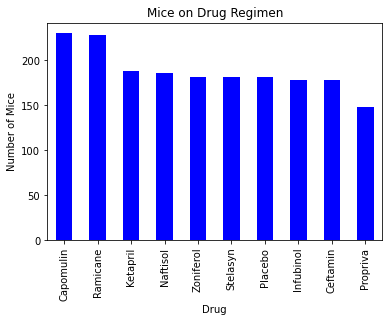

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plot_data= clean_data["Drug Regimen"].value_counts()

#plot_data=plot_data.sort_values(plot_data.values)
#plot_data

plot_data.plot(kind="bar", facecolor="blue")
plt.title("Mice on Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")
plt.show()

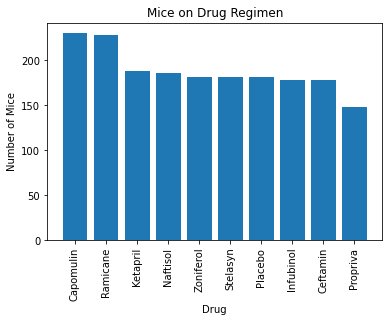

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = plot_data.index.values
y = plot_data.values

plt.bar(x, y)
plt.xticks(rotation= 90)
plt.title("Mice on Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")


plt.show()



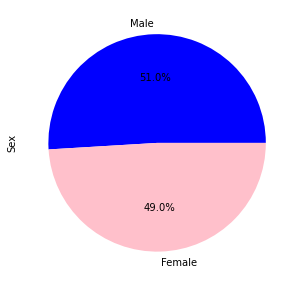

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

m_f= clean_data["Sex"].value_counts()

colors= ["blue", 'pink']

m_f.plot(kind="pie", y= m_f, figsize=(5,5), colors= colors, autopct="%1.1f%%")



plt.show()

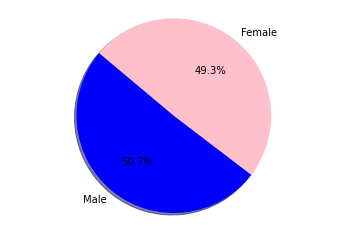

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_mf=clean_data.groupby(["Sex"]).count()
count_mf

labels=["Male", "Female"]
count=[958, 930]
colors=["blue", 'pink']
explode= (0.1,0)

plt.pie(count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
each_mouse= clean_data.groupby(["Mouse ID"]).max()["Timepoint"]

each_mouse=each_mouse.reset_index()
each_mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merg_data=each_mouse.merge(clean_data,on= ["Mouse ID", "Timepoint"], how="left")
merg_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=merg_data.loc[merg_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier=tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]
    print(f"{drug} {outlier}")


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


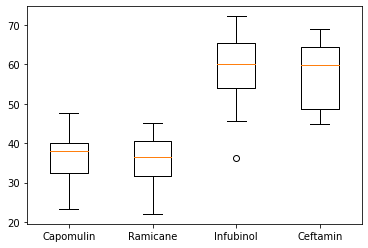

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels= treatment)
plt.show()

## Line and Scatter Plots

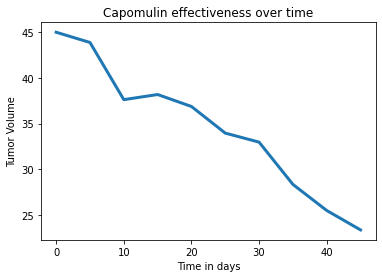

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo= complete_data.loc[complete_data["Drug Regimen"]=="Capomulin"]
capo
graph=capo.loc[capo["Mouse ID"]== "s185", :]

graph

plt.plot(graph["Timepoint"], graph["Tumor Volume (mm3)"], linewidth=3, markersize=12)

plt.xlabel("Time in days")
plt.ylabel("Tumor Volume")
plt.title("Capomulin effectiveness over time")
plt.show ()
#timepoint= merg_data.loc[merg_data["Drug Regimen"]=="Capomulin"].iloc[:,1]


#plt.plot(tumor_volume, timepoint)
#plt.show()


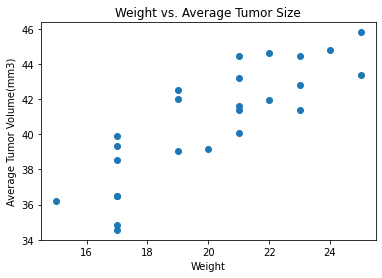

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_avg_df = capo.groupby(['Mouse ID']).mean()
capo_avg_df
plt.scatter(capo_avg_df["Weight (g)"], capo_avg_df["Tumor Volume (mm3)"])
plt.title("Weight vs. Average Tumor Size")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between Mouse weight and tumor size is 0.84


Text(0, 0.5, 'Average Tumor Size')

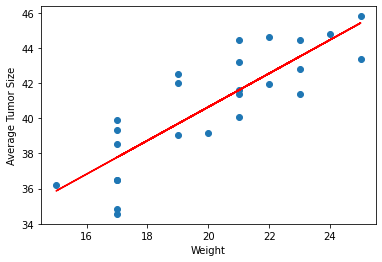

In [61]:
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between Mouse weight and tumor size is {corr}")

# for mouse weight and average tumor volume for the Capomulin regimen
weight=capo_avg_df["Weight (g)"]
tumor_volume=capo_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")

      
